# Análise de dados de poço do campo de Namorado

*Marcos Conceição & Matheus Barbosa*

11 de junho de 2021

Disciplina: **GEO162 (2021.1)**

Docente: **Suzan Vasconcelos**

## Material recebido

- Descrição da tarefa (pdf);
- Perfis de poço em diversos formatos (las, m, txt);
- Infográfico com análise sequencial de testemunhos.

Foi escolhida a linguagem Python para realizar a leitura, análise e apresentação dos resultados.

## Carregamento de bibliotecas

As seguintes bibliotecas serão úteis para o estudo a seguir:

- NumPy, para computação científica;
- Pandas, para lidar com os dados de forma organizada;
- Matplotlib, para gerar gráficos simples; e
- Seaborn, para facilitar a geração de gráficos mais complexos.

Ademais, importa-se também a biblioteca warnings para que se possa ignorar avisos futuros inoportunos (opcional).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings("ignore")

## Leitura dos perfis

A leitura dos dados em formato "txt" foi executada a partir da biblioteca Pandas. Em ordem, foram lidas colunas relativas aos perfis de profundidade (DEPT), sônico (DT), gamma-ray (GR), resistividade (ILD), porosidade neutrônica (NPHI) e densidade (RHOB).

In [2]:
path = r'C:\Users\mathe\Desktop\MATHEUS\UFBA\8º Semestre\Geofísica do Petróleo\Atividade_Suzan\Relatório\NA02.txt'
data = pd.read_csv(path, delim_whitespace=True)
data.columns = 'DEPT DT GR ILD NPHI RHOB'.split()
data.head()

,DEPT,DT,GR,ILD,NPHI,RHOB
0,2975.0,91.2695,66.4531,1.8425,21.7996,2.4617
1,2975.2,90.9399,68.4648,1.7627,21.8086,2.4266
2,2975.4,90.3281,69.0938,1.7114,23.1367,2.4270
3,2975.6,87.7031,67.7969,1.6621,24.6211,2.4411
4,2975.8,85.2031,67.1992,1.5940,25.5234,2.4502


## Plotagem dos perfis em função da profundidade

A fim de observar o comportamento geral das propriedades, seus valores foram plotados em profundidade abaixo:  

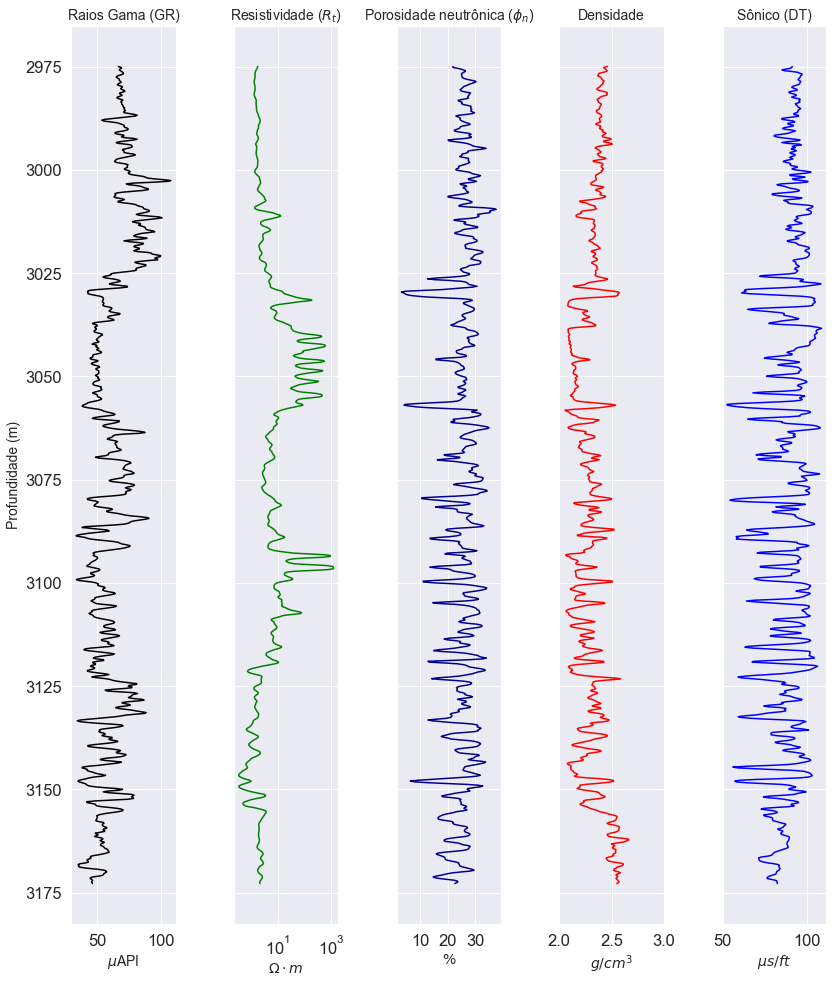

In [3]:
fig, axes = plt.subplots(ncols=5, figsize=(12,14))

#Plotando as informações
axes[0].plot(data.GR, data.DEPT, c='black')
axes[1].plot(data.ILD, data.DEPT, c='green')
axes[2].plot(data.NPHI, data.DEPT, c='darkblue')
axes[3].plot(data.RHOB, data.DEPT, c='red')
axes[4].plot(data.DT, data.DEPT, c='blue')

#Estilização dos gráficos
axes[1].set_xscale('log')
axes[3].set_xlim(2,3)
axes[3].set_xticks(np.arange(2, 3.5, 0.5))

axes[0].set_ylabel('Profundidade (m)', fontsize=14)
axes[0].set_title('Raios Gama (GR)', fontsize=14)
axes[1].set_title('Resistividade ($R_t$)', fontsize=14)
axes[2].set_title('Porosidade neutrônica ($\phi_n$)', fontsize=14)
axes[3].set_title('Densidade', fontsize=14)
axes[4].set_title('Sônico (DT)', fontsize=14)

axes[1].set_yticklabels('')
axes[2].set_yticklabels('')
axes[3].set_yticklabels('')
axes[4].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=14)
axes[1].set_xlabel('$\Omega \cdot m$', fontsize=14)
axes[2].set_xlabel('$\%$', fontsize=14)
axes[3].set_xlabel('$g/cm^3$', fontsize=14)
axes[4].set_xlabel('$\mu s/ft$', fontsize=14)

for ax in axes:
    ax.invert_yaxis()
                
plt.tight_layout()

plt.savefig('perfis', dpi=300)
plt.show()

## Linearizando medidas de resistividade

O cálculo da correlação linear toma como premissa que as variáveis utilizadas variem linearmente umas com as outras. 
Entretanto, a distribuição de resistividades se dá de forma log-normal, e por isso faz-se necessária a produção do perfil virtual "log(ILD)", que toma o logaritmo das medidas do ILD para produzir um perfil com distribuição normal.

In [4]:
data['log(ILD)'] = np.log(data.ILD)

## Matrizes de correlação

Os gráficos abaixo mostram as distribuições das diferentes propriedades amostradas. Os gráficos localizados na região inferior mostram densidades de probabilidades 2D, contínuas. Já no centro, mostram-se histogramas, gráficos de frequência de amostras de cada perfil. Por fim, na região superior, cross-plots e regressões lineares dão ideia das correlações encontradas entre as propriedades.

In [5]:
variables = ['DT', 'GR', 'log(ILD)', 'NPHI', 'RHOB']

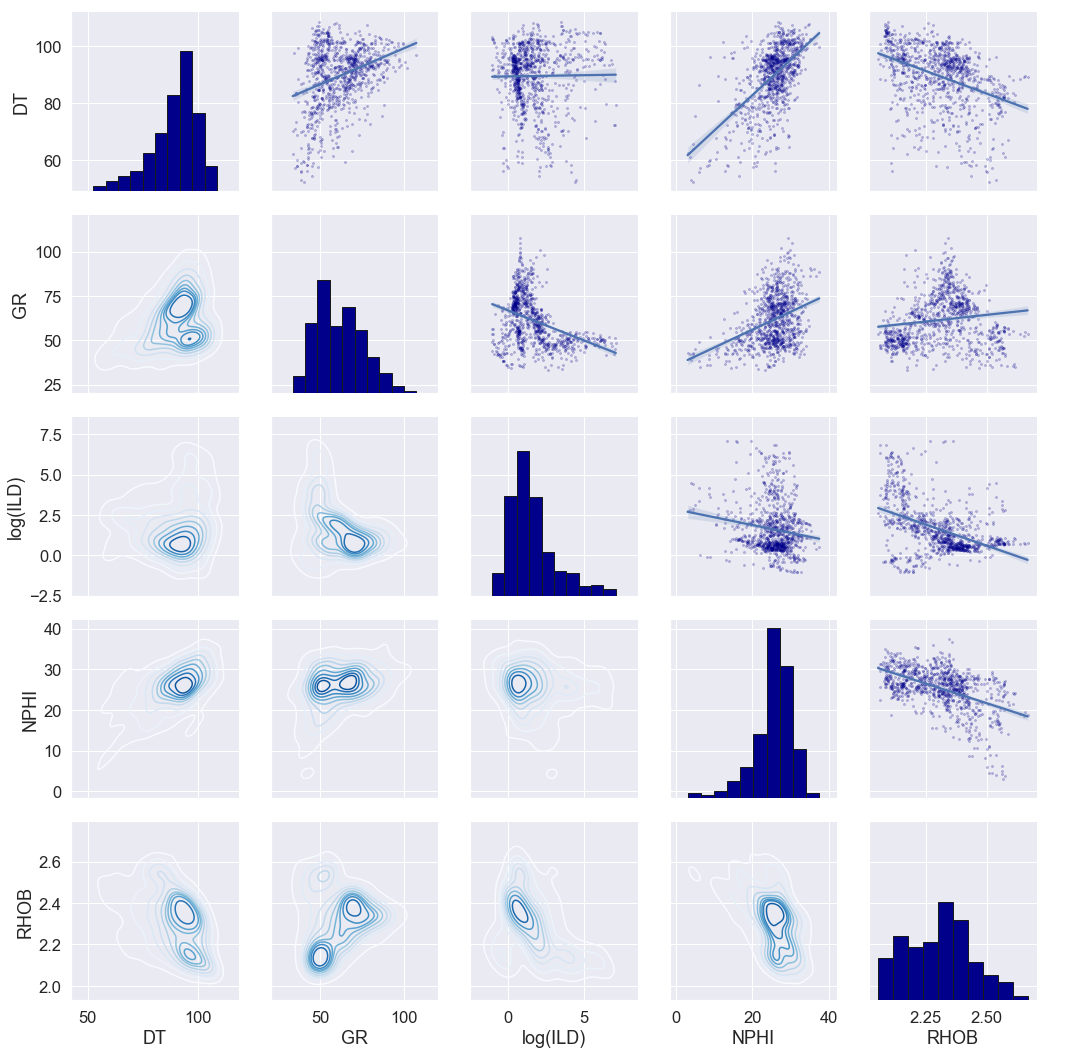

In [6]:
grid = sns.PairGrid(data=data, vars=variables, size=3, corner=False)
grid = grid.map_upper(sns.regplot, scatter_kws={'alpha': 0.2, 's':4, 'color': 'darkblue'})
grid = grid.map_diag(plt.hist, bins=10, color='darkblue', edgecolor='k')
grid = grid.map_lower(sns.kdeplot, cmap='Blues')

plt.savefig('corr-matrix', dpi=300)

Visualmente percebe-se que as melhores relações lineares são encontradas entre os perfies GR-DT, GR-log(ILD) e DT-NPHI. Numericamente, o valor das correlações pode ser aferido por meio do coeficiente de Pearson calculado entre cada variável. Este resultado pode ser visto a seguir:

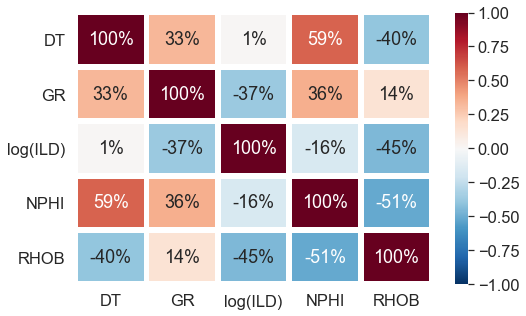

In [7]:
plt.figure(figsize=(8,5))
corr = data[variables].corr()

sns.heatmap(corr, lw=5, fmt='.0%', linewidths=2, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.savefig('pearson-matrix', dpi = 300)

Os valores de correlação encontrados evidenciam também uma variação conjunta significativa entre densidade e porosidade neutrônica (-51%).

## Evidenciando níveis das amostras

A análise entre perfis pode ser auxiliada se cores forem associadas a cada profundidade, como a seguir:

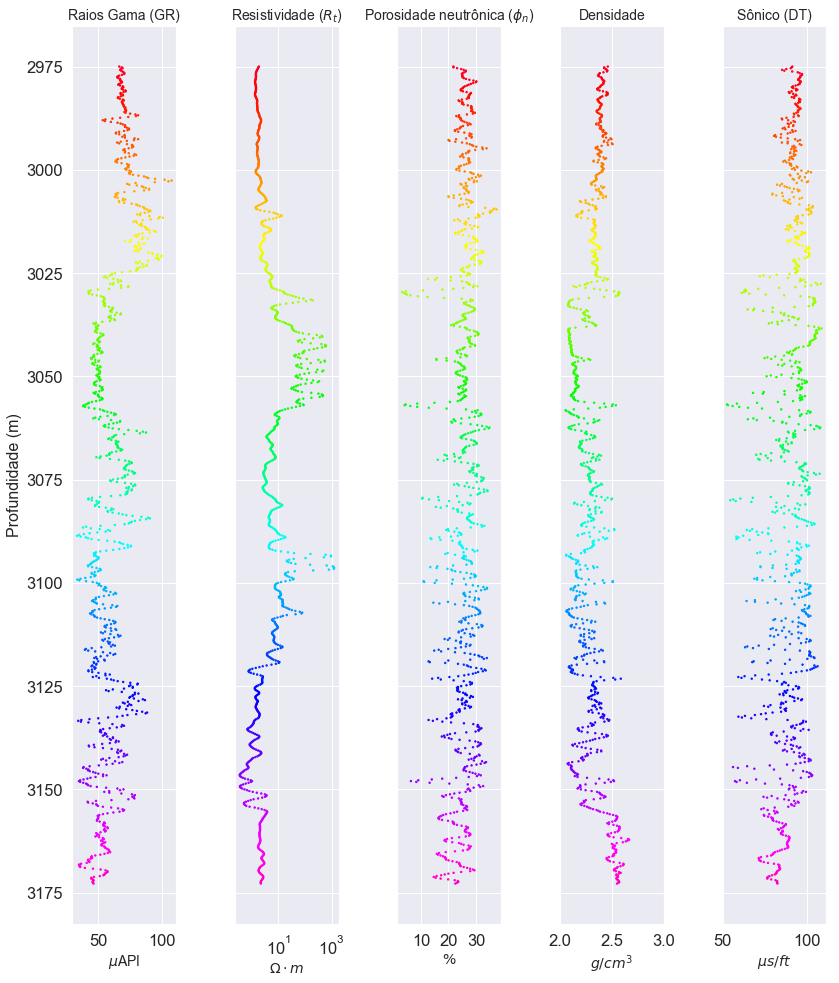

In [8]:
z = data.DEPT
cmap = 'gist_rainbow'
fig, axes = plt.subplots(ncols=5, figsize=(12,14))
#Plotando as informações

im = axes[0].scatter(data.GR, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.ILD, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.NPHI, data.DEPT, c=z, s=2, cmap=cmap)
axes[3].scatter(data.RHOB, data.DEPT, c=z, s=2, cmap=cmap)
axes[4].scatter(data.DT, data.DEPT, c=z, s=2, cmap=cmap)

# cax = plt.colorbar(im, ax=axes[4], orientation='vertical', extend='max')
# cax.set_label('$Profundidade (m)$', fontsize=14)

#Estilização dos gráficos
axes[1].set_xscale('log')
axes[3].set_xlim(2,3)
axes[3].set_xticks(np.arange(2, 3.5, 0.5))

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('Raios Gama (GR)', fontsize=14)
axes[1].set_title('Resistividade ($R_t$)', fontsize=14)
axes[2].set_title('Porosidade neutrônica ($\phi_n$)', fontsize=14)
axes[3].set_title('Densidade', fontsize=14)
axes[4].set_title('Sônico (DT)', fontsize=14)

axes[1].set_yticklabels('')
axes[2].set_yticklabels('')
axes[3].set_yticklabels('')
axes[4].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=14)
axes[1].set_xlabel('$\Omega \cdot m$', fontsize=14)
axes[2].set_xlabel('$\%$', fontsize=14)
axes[3].set_xlabel('$g/cm^3$', fontsize=14)
axes[4].set_xlabel('$\mu s/ft$', fontsize=14)

for ax in axes:
    ax.invert_yaxis()
    
plt.tight_layout()

plt.savefig('perfis-id-reservatorios', dpi=300)

## Crossplots

A ideia de adicionar a informação de profundidade nos gráficos pode ser especialmente útil nos cross-plots. Desta maneira, pode-se identificar possíveis grupamentos de propriedades em profundidade, a partir das cores próximas. Este tipo de visualização é demonstrada a seguir para cada dupla de variáveis. 

In [9]:
cmap = 'gist_rainbow'

### GR-NPHI

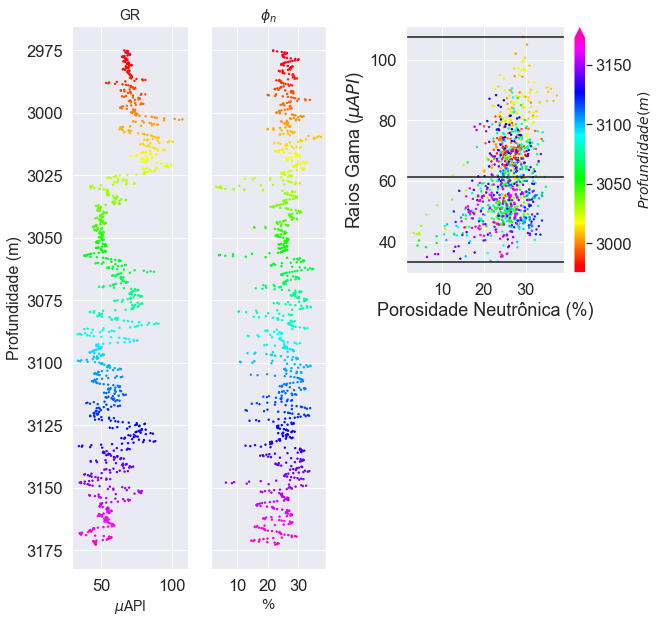

In [10]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.GR, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.NPHI, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.NPHI, data.GR, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=14)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('GR', fontsize=14)
axes[1].set_title('$\phi_n$', fontsize=14)

axes[1].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=14)
axes[1].set_xlabel('$\%$', fontsize=14)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Porosidade Neutrônica (%)')
axes[2].set_ylabel('Raios Gama ($\mu API$)')
axes[2].axhline(min(data.GR), c='k')
axes[2].axhline(max(data.GR), c='k')
axes[2].axhline(np.mean(data.GR), c='k')
                
plt.tight_layout()

plt.savefig('GR-NPHI-crossplot', dpi = 300)

### GR-RHOB

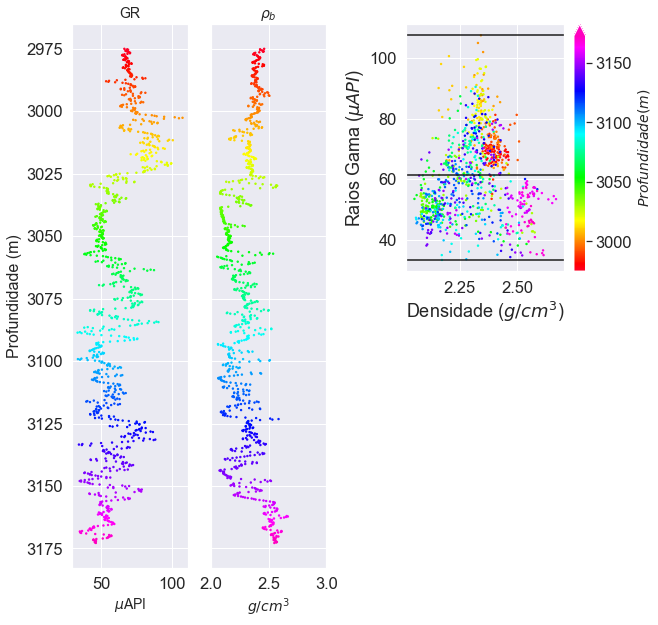

In [11]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.GR, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.RHOB, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.RHOB, data.GR, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=14)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('GR', fontsize=14)
axes[1].set_title('$\\rho_b$', fontsize=14)

axes[1].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=14)
axes[1].set_xlabel('$g/cm^3$', fontsize=14)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Densidade ($g/cm^3$)')
axes[2].set_ylabel('Raios Gama ($\mu API$)')
axes[2].axhline(min(data.GR), c='k')
axes[2].axhline(max(data.GR), c='k')
axes[2].axhline(np.mean(data.GR), c='k')
axes[1].set_xticks(np.arange(2, 3.5, 0.5))
                
plt.tight_layout()

plt.savefig('GR-RHOB-crossplot', dpi = 300)

### RHOB-NPHI

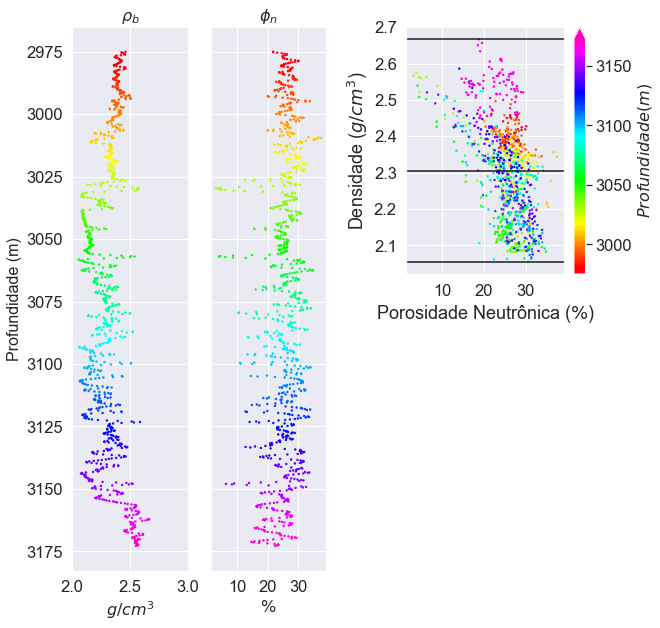

In [12]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.RHOB, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.NPHI, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.NPHI, data.RHOB, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('$\\rho_b$', fontsize=16)
axes[1].set_title('$\phi_n$', fontsize=16)

axes[1].set_yticklabels('')

axes[0].set_xlabel('$g/cm^3$', fontsize=16)
axes[1].set_xlabel('$\%$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_ylabel('Densidade ($g/cm^3$)')
axes[2].set_xlabel('Porosidade Neutrônica ($\%$)')
axes[2].axhline(min(data.RHOB), c='k')
axes[2].axhline(max(data.RHOB), c='k')
axes[2].axhline(np.mean(data.RHOB), c='k')
axes[0].set_xticks(np.arange(2, 3.5, 0.5))
                
plt.tight_layout()

plt.savefig('RHOB-NPHI-crossplot', dpi=300)

### GR-DT

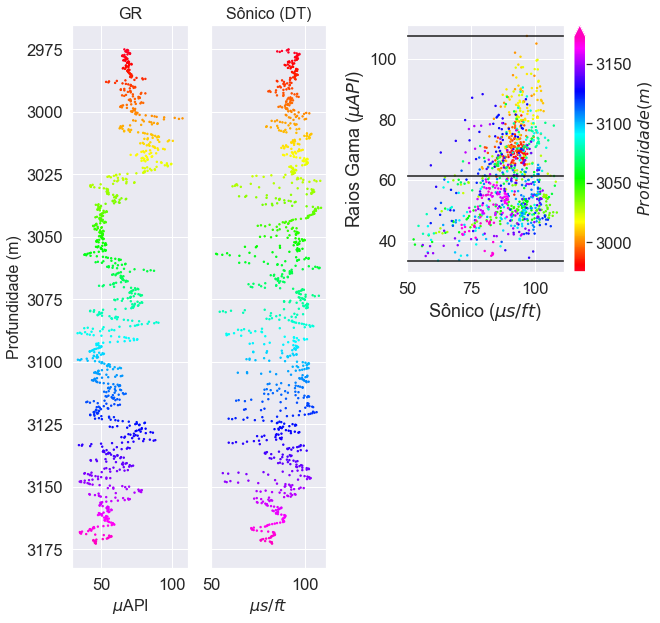

In [13]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.GR, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.DT, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.DT, data.GR, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('GR', fontsize=16)
axes[1].set_title('Sônico (DT)', fontsize=16)

axes[1].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=16)
axes[1].set_xlabel('$\mu s/ft$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Sônico ($\mu s/ft$)')
axes[2].set_ylabel('Raios Gama ($\mu API$)')
axes[2].axhline(min(data.GR), c='k')
axes[2].axhline(max(data.GR), c='k')
axes[2].axhline(np.mean(data.GR), c='k')
                
plt.tight_layout()

plt.savefig('GR-DT-crossplot', dpi=300)

### GR-ILD

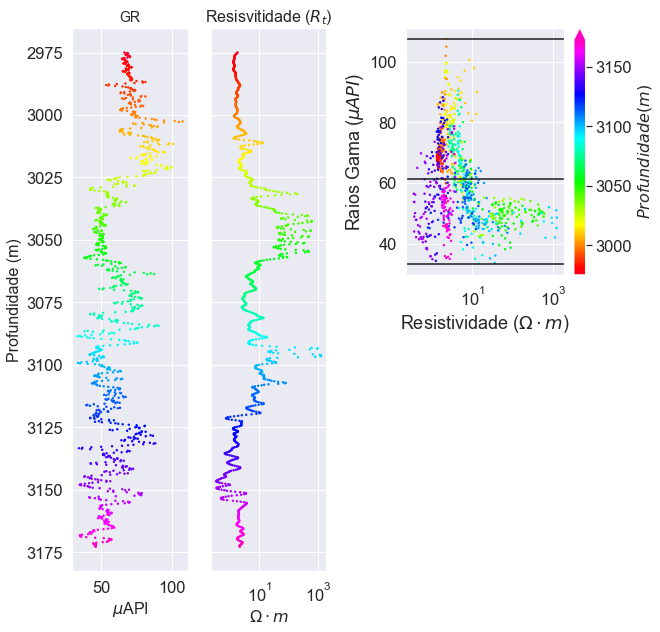

In [14]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.GR, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.ILD, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.ILD, data.GR, c=z, s=2, cmap=cmap)


cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('GR', fontsize=14)
axes[1].set_title('Resisvitidade ($R_t$)', fontsize=16)

axes[1].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=16)
axes[1].set_xlabel('$\Omega \cdot m$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Resistividade ($\Omega \cdot m$)')
axes[2].set_ylabel('Raios Gama ($\mu API$)')
axes[2].axhline(min(data.GR), c='k')
axes[2].axhline(max(data.GR), c='k')
axes[2].axhline(np.mean(data.GR), c='k')

axes[1].set_xscale('log')
axes[2].set_xscale('log')
                
plt.tight_layout()

plt.savefig('GR-ILD-crossplot', dpi=300)

### NPHI-ILD

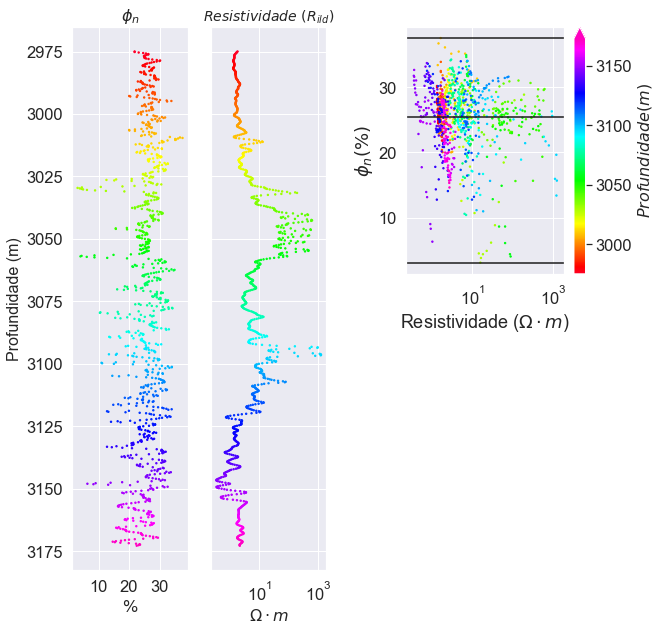

In [15]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.NPHI, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.ILD, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.ILD, data.NPHI, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[1].set_title('$Resistividade \ (R_{ild})$', fontsize=14)
axes[0].set_title('$\phi_n$', fontsize=16)

axes[1].set_yticklabels('')

axes[1].set_xlabel('$\Omega \cdot m$', fontsize=16)
axes[0].set_xlabel('$\%$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Resistividade ($\Omega \cdot m$)')
axes[2].set_ylabel('$\phi_n (\%)$')
axes[2].axhline(min(data.NPHI), c='k')
axes[2].axhline(max(data.NPHI), c='k')
axes[2].axhline(np.mean(data.NPHI), c='k')

axes[1].set_xscale('log')
axes[2].set_xscale('log')

plt.tight_layout()

plt.savefig('ILD-NPHI-crossplot', dpi=300)

### NPHI-DT

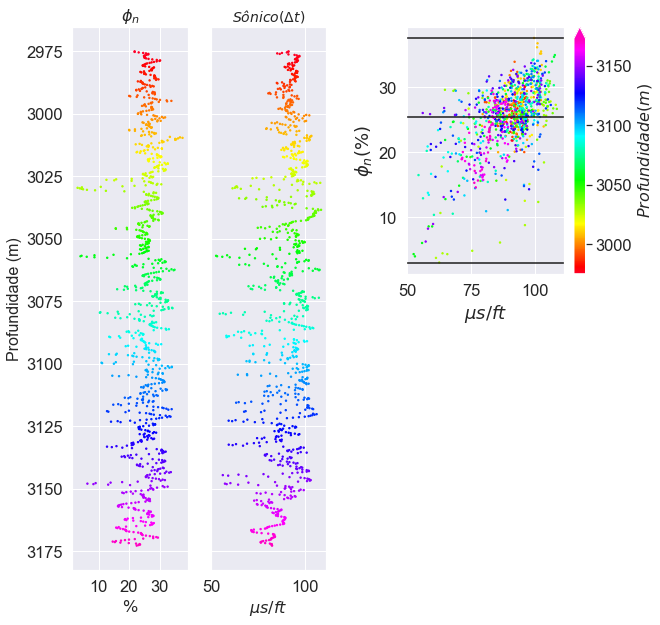

In [16]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.NPHI, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.DT, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.DT, data.NPHI, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[1].set_title('$Sônico (\Delta t)$', fontsize=14)
axes[0].set_title('$\phi_n$', fontsize=16)

axes[1].set_yticklabels('')

axes[1].set_xlabel('$\mu s/ft$', fontsize=16)
axes[0].set_xlabel('$\%$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('$\mu s/ft$')
axes[2].set_ylabel('$\phi_n (\%)$')
axes[2].axhline(min(data.NPHI), c='k')
axes[2].axhline(max(data.NPHI), c='k')
axes[2].axhline(np.mean(data.NPHI), c='k')

plt.tight_layout()

plt.savefig('DT-NPHI-crossplot', dpi=300)

### ILD-DT

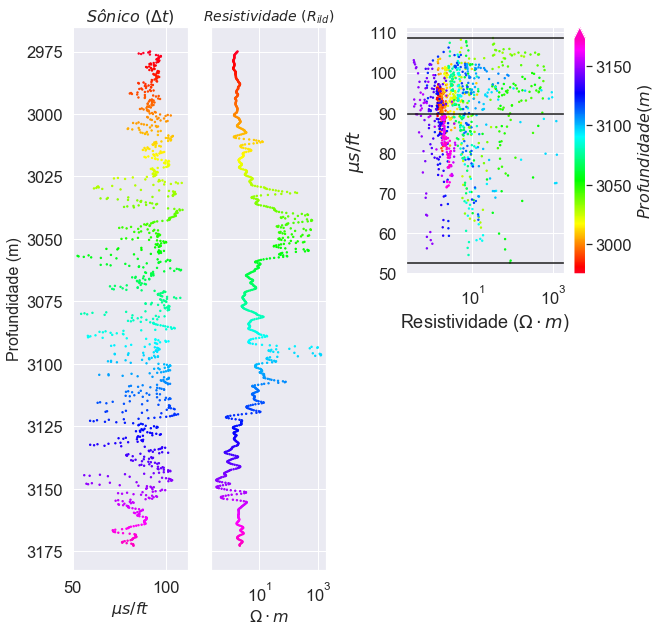

In [17]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.DT, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.ILD, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.ILD, data.DT, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[1].set_title('$Resistividade \ (R_{ild})$', fontsize=14)
axes[0].set_title('$Sônico \ (\Delta t)$', fontsize=16)

axes[1].set_yticklabels('')

axes[1].set_xlabel('$\Omega \cdot m$', fontsize=16)
axes[0].set_xlabel('$\mu s/ft$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Resistividade ($\Omega \cdot m$)')
axes[2].set_ylabel('$\mu s/ft$')
axes[2].axhline(min(data.DT), c='k')
axes[2].axhline(max(data.DT), c='k')
axes[2].axhline(np.mean(data.DT), c='k')

axes[1].set_xscale('log')
axes[2].set_xscale('log')

plt.tight_layout()

plt.savefig('ILD-DT-crossplot', dpi=300)

### ILD-RHOB

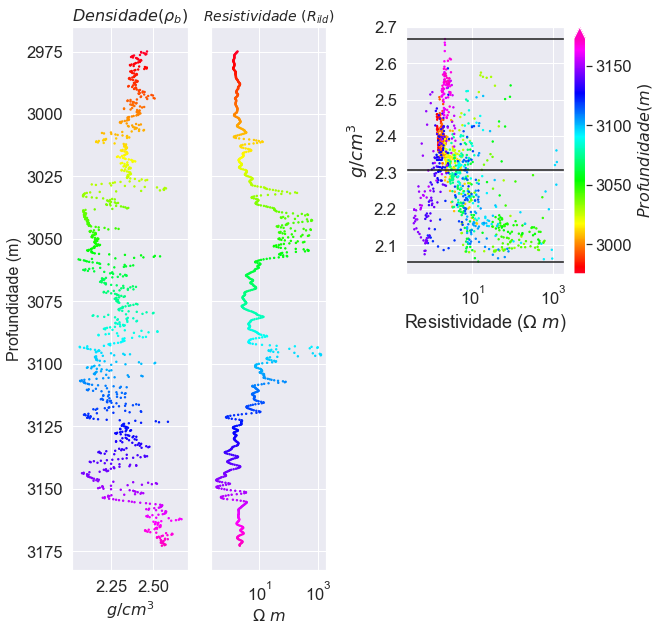

In [18]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.RHOB, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.ILD, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.ILD, data.RHOB, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[1].set_title('$Resistividade \ (R_{ild})$', fontsize=14)
axes[0].set_title('$Densidade (\\rho_b)$', fontsize=16)

axes[1].set_yticklabels('')

axes[1].set_xlabel('$\Omega \ m$', fontsize=16)
axes[0].set_xlabel('$g/cm^3$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('Resistividade ($\Omega \ m$)')
axes[2].set_ylabel('$g/cm^3$')
axes[2].axhline(min(data.RHOB), c='k')
axes[2].axhline(max(data.RHOB), c='k')
axes[2].axhline(np.mean(data.RHOB), c='k')

axes[1].set_xscale('log')
axes[2].set_xscale('log')

plt.tight_layout()

plt.savefig('ILD-RHOB-crossplot', dpi=300)

### DT-RHOB

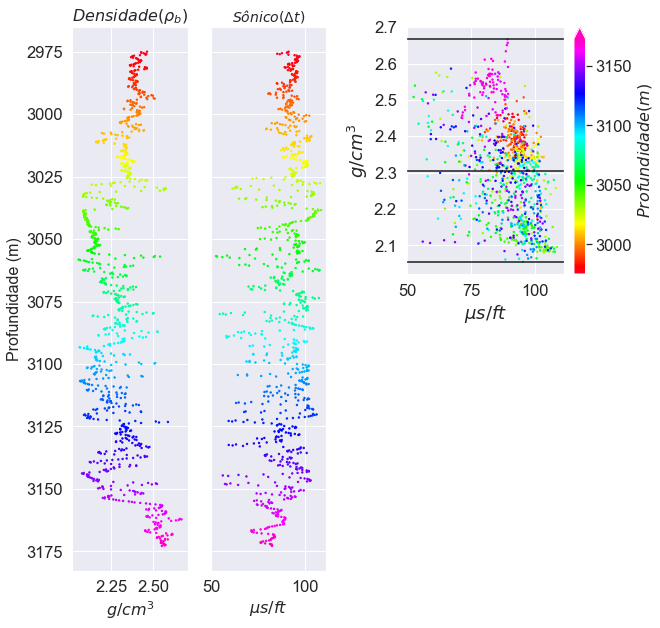

In [19]:
plt.figure(figsize=(12,10))
ax1 = plt.subplot(1,5,2)
ax2 = plt.subplot(1,5,3)
ax3 = plt.subplot(2,3,3)
axes = [ax1, ax2, ax3]

im = axes[0].scatter(data.RHOB, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.DT, data.DEPT, c=z, s=2, cmap=cmap)
axes[2].scatter(data.DT, data.RHOB, c=z, s=2, cmap=cmap)

cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=16)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[1].set_title('$Sônico (\Delta t)$', fontsize=14)
axes[0].set_title('$Densidade (\\rho_b)$', fontsize=16)

axes[1].set_yticklabels('')

axes[1].set_xlabel('$\mu s/ft$', fontsize=16)
axes[0].set_xlabel('$g/cm^3$', fontsize=16)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[2].set_xlabel('$\mu s/ft$')
axes[2].set_ylabel('$g/cm^3$')
axes[2].axhline(min(data.RHOB), c='k')
axes[2].axhline(max(data.RHOB), c='k')
axes[2].axhline(np.mean(data.RHOB), c='k')

plt.tight_layout()

plt.savefig('DT-RHOB-crossplot', dpi=300)

### Múltiplos cross-plots

A seguir, cross-plots relevantes com informação de profundidade são mostrados em conjunto:

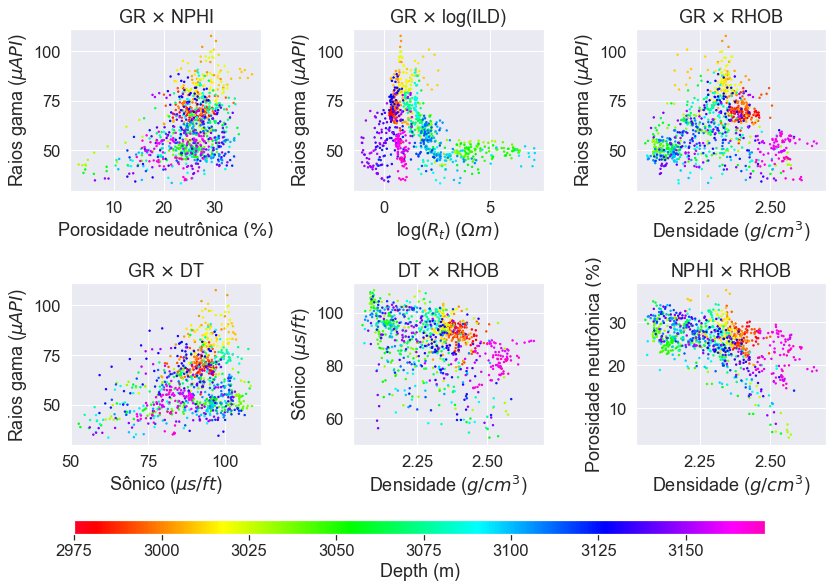

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sc = axes[0][0].scatter(data.NPHI, data.GR, c=z, s=2, cmap=cmap)
sc = axes[0][1].scatter(data['log(ILD)'], data.GR, c=z, s=2, cmap=cmap)
sc = axes[0][2].scatter(data.RHOB, data.GR, c=z, s=2, cmap=cmap)
sc = axes[1][0].scatter(data.DT, data.GR, c=z, s=2, cmap=cmap)
sc = axes[1][1].scatter(data.RHOB, data.DT, c=z, s=2, cmap=cmap)
sc = axes[1][2].scatter(data.RHOB, data.NPHI, c=z, s=2, cmap=cmap)

axes[0][0].set_title(r'GR $\times$ NPHI')
axes[0][1].set_title(r'GR $\times$ log(ILD)')
axes[0][2].set_title(r'GR $\times$ RHOB')
axes[1][0].set_title(r'GR $\times$ DT')
axes[1][1].set_title(r'DT $\times$ RHOB')
axes[1][2].set_title(r'NPHI $\times$ RHOB')

axes[0][0].set_xlabel('Porosidade neutrônica $(\%)$')
axes[0][1].set_xlabel('log($R_t$) ($\Omega m$)')
axes[0][2].set_xlabel('Densidade ($g/cm^3$)')
axes[1][0].set_xlabel('Sônico ($\mu s/ft$)')
axes[1][1].set_xlabel('Densidade ($g/cm^3$)')
axes[1][2].set_xlabel('Densidade ($g/cm^3$)')

axes[0][0].set_ylabel('Raios gama ($\mu API$)')
axes[0][1].set_ylabel('Raios gama ($\mu API$)')
axes[0][2].set_ylabel('Raios gama ($\mu API$)')
axes[1][0].set_ylabel('Raios gama ($\mu API$)')
axes[1][1].set_ylabel('Sônico ($\mu s/ft$)')
axes[1][2].set_ylabel('Porosidade neutrônica $(\%)$')

cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.025])
fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar_ax.set_xlabel('Depth (m)')


fig.tight_layout(rect=[0,.08,1,1])
plt.savefig('multiplos_crossplots.png')

Apesar da alta dispersão de valores em relação às profundidades dos dois plots mais à esquerda (GR $\times$ log(ILD) e GR $\times$ DT), pode-se perceber nos perfis:

Os pontos verdes (entre 3025 e 3075 m) chamam atenção nos perfis. No gráfico de GR $\times$ log(ILD), eles formam uma anomalia de altíssimas resistividades (entre $10^4$ e $10^6$ $\Omega$m). No perfil GR $\times$ RHOB, os mesmos pontos verdes citados se identificam com as menores densidades do cross-plot (2.10 $g/cm^3$). O gráfico de DT $\times$ RHOB mostra tais pontos como possuindo as menores velocidades propagação sísmica (valores mais altos do DT, em torno de 110 ms/ft). Por outro lado, em NPHI $\times$ GR, o grupo de pontos é identificado com porosidades altas (25%).

Os pontos em azul (a 3100 m de profundidade) se comportam de forma geralmente semelhante aos verdes, não fosse pela menor resistividade, que ainda é mais alta que a média ($10^3\ \Omega m$). Suas porosidades orbitam os 30%, bem como tendem a ser mais leves que a média (2.10 $g/cm^3$), como observado em NPHI $\times$ RHOB. Por fim, o perfil sônico indica baixas velocidades de propagação sísmica (altos de DT em torno de 100 ms/ft).

Os pontos amarelados apresentam valores picos em raios-gamma, alta porosidade (~30%), densidade de 2.4 $g/cm^3$ e valores elevados de DT, que implicam baixa velocidade de propagação sísmica.

Em último lugar, os pontos rosados também indicam anomalias. Nas maiores profundidades, correspondem a rochas com baixíssima resistividade, densidades as maiores, em torno de 2.5 $g/cm^3$, porosidades em torno de 20% e velocidades sísmicas superiores à média, com base nos menores valores do sônico obtidos.

In [21]:
def phid(rhob, rhoma, rhof):
    return (rhob-rhoma)/(rhof-rhoma)

In [22]:
# rhoma = 2.00 # matriz calcárea
rhomja = 2.65 # matriz arenosa
#rhoma = 2.68 # matriz de areia calcárea
# rhoma = 2.87 # matriz dolomítica

In [23]:
data['PHID'] = 100*data.RHOB.apply(lambda rhob: phid(rhob, rhoma=rhomja, rhof=1))

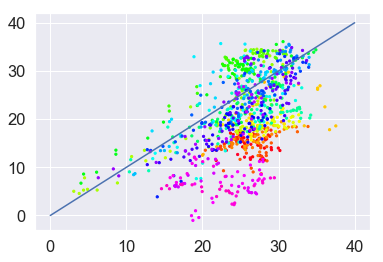

In [45]:
plt.scatter(data['NPHI'], data['PHID'], c=z, cmap=cmap, s=5)
plt.plot([0,40],[0,40])

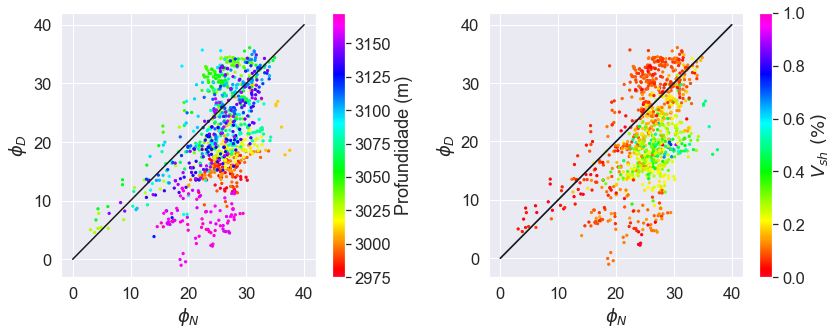

In [46]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sc = axes[0].scatter(data['NPHI'], data['PHID'], c=data.DEPT, cmap=cmap, s=5)
c = plt.colorbar(sc, ax=axes[0])
c.ax.set_ylabel('Profundidade (m)')

plt.plot([0,40],[0,40])
sc = axes[1].scatter(data['NPHI'], data['PHID'], c=data.VSH, cmap=cmap, s=5)
c = plt.colorbar(sc, ax=axes[1])
c.ax.set_ylabel(r'$V_{sh}\ (\%)$')

for ax in axes:
    ax.plot([0,40],[0,40], c='k')
    ax.set_xlabel(r'$\phi_N$')
    ax.set_ylabel(r'$\phi_D$')

fig.tight_layout()
#plt.savefig('phin-phid.png')

### Calculando IA e Vsh

In [35]:
data['AI'] = data.RHOB*(10**6/data.DT) 
data['IGR'] = (data.GR - min(data.GR))/(max(data.GR) - min(data.GR))
data['VSH'] = data.IGR/(3-(3-1)*data.IGR)

### Calculando Sw

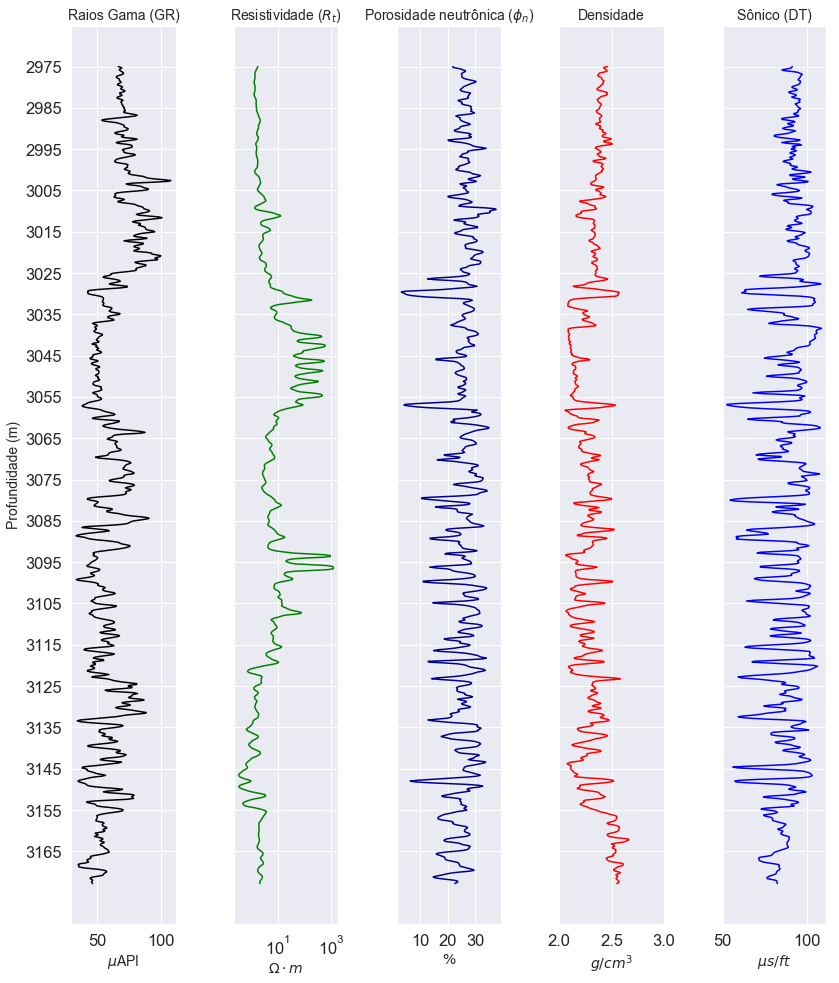

In [36]:
fig, axes = plt.subplots(ncols=5, figsize=(12,14))

#Plotando as informações
axes[0].plot(data.GR, data.DEPT, c='black')
axes[1].plot(data.ILD, data.DEPT, c='green')
axes[2].plot(data.NPHI, data.DEPT, c='darkblue')
axes[3].plot(data.RHOB, data.DEPT, c='red')
axes[4].plot(data.DT, data.DEPT, c='blue')

#Estilização dos gráficos

axes[1].set_xscale('log')
axes[3].set_xlim(2,3)
axes[3].set_xticks(np.arange(2, 3.5, 0.5))

axes[0].set_ylabel('Profundidade (m)', fontsize=14)
axes[0].set_title('Raios Gama (GR)', fontsize=14)
axes[1].set_title('Resistividade ($R_t$)', fontsize=14)
axes[2].set_title('Porosidade neutrônica ($\phi_n$)', fontsize=14)
axes[3].set_title('Densidade', fontsize=14)
axes[4].set_title('Sônico (DT)', fontsize=14)

axes[1].set_yticklabels('')
axes[2].set_yticklabels('')
axes[3].set_yticklabels('')
axes[4].set_yticklabels('')

axes[0].set_xlabel('$\mu$API', fontsize=14)
axes[1].set_xlabel('$\Omega \cdot m$', fontsize=14)
axes[2].set_xlabel('$\%$', fontsize=14)
axes[3].set_xlabel('$g/cm^3$', fontsize=14)
axes[4].set_xlabel('$\mu s/ft$', fontsize=14)

for ax in axes:
    ax.invert_yaxis()
    ax.set_yticks(np.arange(min(data.DEPT), max(data.DEPT), 10))
                
plt.tight_layout()
plt.show()

Entre 3094 e 3121 existe uma região com baixos valores de GR e uma anomalia de resistividade que nos leva a entender que há um contato óleo/água naquele pacote. Este contato aparece na profundidade de 3110 metros. Através do método do $R_{wa_{min}}$ calcularemos o $R_w$ para, em seguida, calcularmos a saturação de água em todo o perfil

In [37]:
data.loc[(data.DEPT>3094) & (data.DEPT<3121)]

,DEPT,DT,GR,ILD,NPHI,RHOB,log(ILD),PHID,AI,IGR,VSH,SW,M,N
596,3094.2,96.3516,49.7656,37.3125,25.6367,2.1255,3.619328,31.787879,22059.830869,0.220747,0.086279,0.001725,0.823175,0.660713
597,3094.4,95.7617,49.0273,25.5625,26.4766,2.1523,3.241126,30.163636,22475.582618,0.210784,0.081749,0.002197,0.809150,0.638058
598,3094.6,94.5312,47.9766,20.8750,27.3828,2.1746,3.038552,28.812121,23004.045225,0.196607,0.075421,0.002545,0.804264,0.618229
599,3094.8,94.2812,46.6328,20.8711,28.1152,2.1782,3.038365,28.593939,23103.227367,0.178474,0.067526,0.002565,0.803928,0.610124
600,3095.0,94.9883,45.5273,23.7891,28.2935,2.1684,3.169227,29.187879,22828.074616,0.163557,0.061191,0.002353,0.804619,0.613715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,3120.0,104.3438,45.4023,3.6016,26.7188,2.1130,1.281378,32.545455,20250.364660,0.161870,0.060484,0.005424,0.760613,0.658412
726,3120.2,106.2305,44.7305,2.5664,27.2500,2.0916,0.942504,33.842424,19689.260617,0.152805,0.056712,0.006180,0.758240,0.666453
727,3120.4,105.1289,46.9023,1.9336,28.1055,2.0865,0.659384,34.151515,19847.063938,0.182111,0.069092,0.007055,0.771938,0.661707
728,3120.6,103.9727,47.8757,1.4062,30.1328,2.0963,0.340891,33.557576,20162.023300,0.195245,0.074821,0.008419,0.775584,0.637300


In [38]:
rwa = 1.2345*(data.PHID[729]**2)*data.ILD[729]
data['SW'] = ((0.81*rwa)/(((data.PHID*100)**2)*data.ILD))**0.5

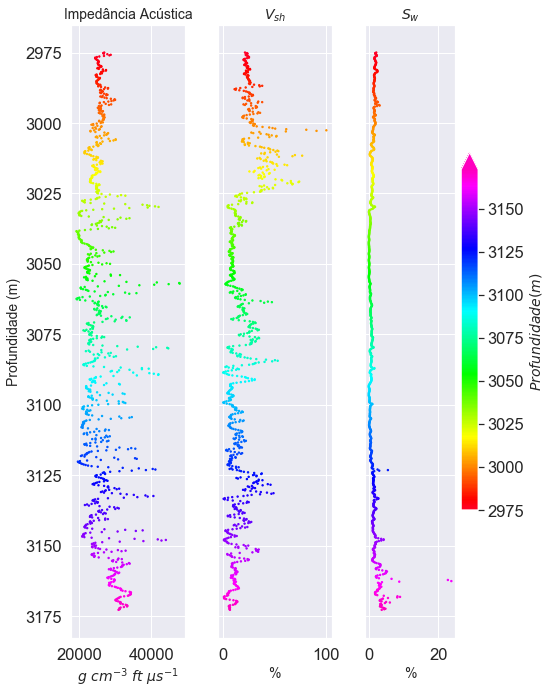

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(8,10))
cmap='gist_rainbow'

axes[0].scatter(data.AI, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.VSH*100, data.DEPT,  c=z, s=2, cmap=cmap)
axes[2].scatter(data[data.SW<0.5].SW*100, data[data.SW<0.5].DEPT,  c=z[:988], s=2, cmap=cmap)

axes[1].set_yticklabels('')
axes[2].set_yticklabels('')

axes[0].set_title('Impedância Acústica', fontsize=14)
axes[1].set_title('$V_{sh}$', fontsize=14)
axes[2].set_title('$S_w$', fontsize=14)

axes[0].set_ylabel('Profundidade (m)', fontsize=14)
axes[0].set_xlabel('$g \ cm^{-3} \ ft \ \mu s^{-1}$', fontsize=14)
axes[1].set_xlabel('%', fontsize=14)
axes[2].set_xlabel('%', fontsize=14)


cax = plt.colorbar(im, ax=axes[2], orientation='vertical', extend='max')
cax.set_label('$Profundidade (m)$', fontsize=14)


for ax in axes:
    ax.invert_yaxis()


plt.tight_layout()

#plt.savefig('ia-vsh-sw', dpi=300)

### M-N Plots

In [30]:
def calc_m(dt, rhob, dtfl, rhofl):
    return 0.01 * (dtfl-dt)/(rhob-rhofl)

def calc_n(phi, rhob, phifl, rhofl):
    return (phifl-phi)/(rhob-rhofl)

In [31]:
data['M'] = calc_m(data.DT, data.RHOB, dtfl=189, rhofl=1)
data['N'] = calc_n(data.NPHI/100, data.RHOB, phifl=1, rhofl=1)

In [32]:
# rhob = {
#     'dolomite': 2.87,
#     'sandstone': 2.65,
#     'anhidrite': 2.98,
#     'limestone': 2.71,
# }

# dt = {
#     'dolomite': 58,
#     'sandstone': 55.5,
#     'anhidrite': 50,
#     'limestone': 47.6,
# }

# nphi = {
#     'dolomite': .14,
#     'sandstone': .28,
#     'anhidrite': .00,
#     'limestone': .20,
# }

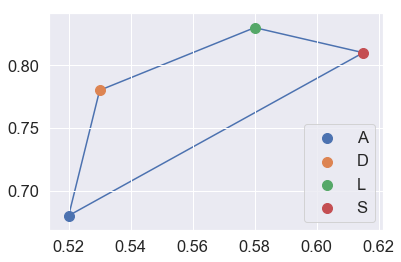

In [33]:
from collections import OrderedDict

n = OrderedDict()
m = OrderedDict()

n['A'], m['A'] = .52, .68
n['D'], m['D'] = .53, .78
n['L'], m['L'] = .58, .83
n['S'], m['S'] = .615, .81

['anhidrite', 'dolomite', 'limestone', 'sandstone']

mlist = [*m.values()]
mlist.append(mlist[0])
nlist = [*n.values()]
nlist.append(nlist[0])

plt.plot(nlist, mlist, zorder=-1)

for k in n:
    plt.scatter(n[k], m[k], label=k.capitalize(), s=100)
plt.legend()

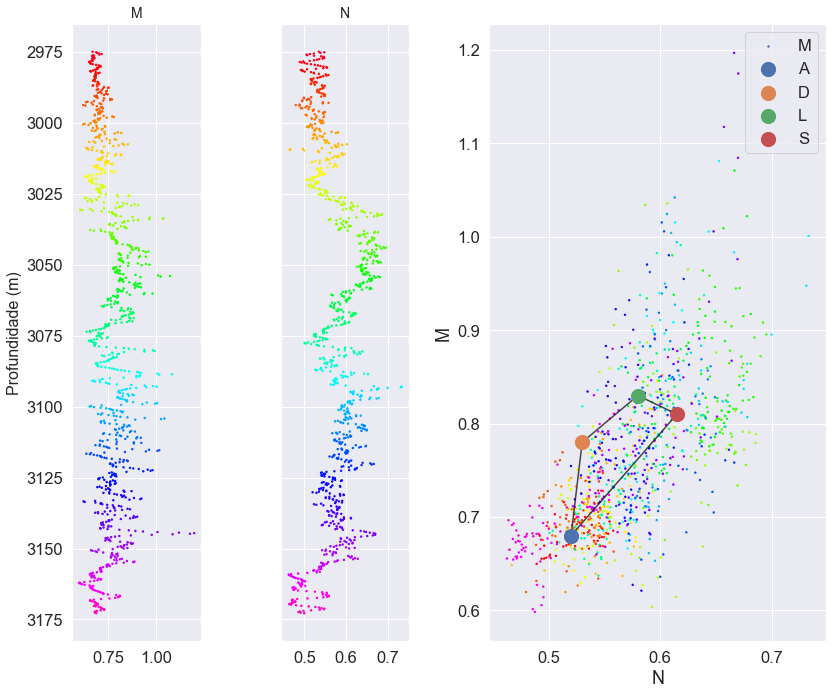

In [47]:
fig, axes = plt.subplots(1,4, figsize=(12,10))

gs = axes.flat[2].get_gridspec()
for ax in axes.flat[2:]:
    ax.remove()
axbig = fig.add_subplot(gs[2:])

sc = axes[0].scatter(data.M, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.N, data.DEPT, c=z, s=2, cmap=cmap)
axbig.scatter(data.N, data.M, c=z, s=2, cmap=cmap)
axbig.plot(nlist, mlist, c='k', alpha=.8)
for k in n:
    axbig.scatter(n[k], m[k], label=k, s=200, zorder=5)

# cax = plt.colorbar(sc, ax=axes[2], orientation='vertical', extend='max')
# cax.set_label('$Profundidade (m)$', fontsize=14)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('M', fontsize=14)
axes[1].set_title('N', fontsize=14)

axes[1].set_yticklabels('')

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axbig.set_xlabel('N')
axbig.set_ylabel('M')
    
axbig.legend()
                
plt.tight_layout()
#plt.savefig('mn-plot.png')

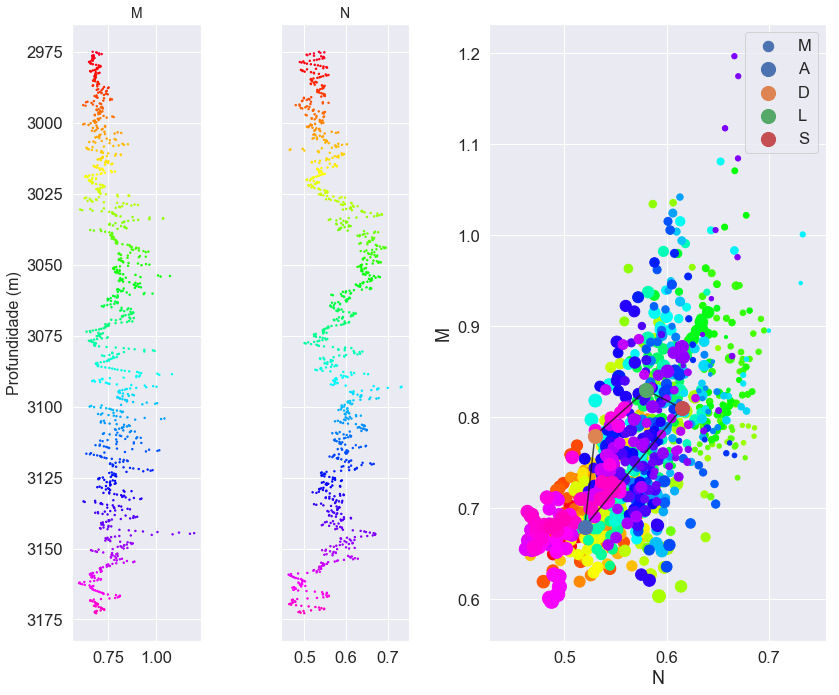

In [48]:
fig, axes = plt.subplots(1,4, figsize=(12,10))

gs = axes.flat[2].get_gridspec()
for ax in axes.flat[2:]:
    ax.remove()
axbig = fig.add_subplot(gs[2:])

sc = axes[0].scatter(data.M, data.DEPT, c=z, s=2, cmap=cmap)
axes[1].scatter(data.N, data.DEPT, c=z, s=2, cmap=cmap)

rhobsc = (data.RHOB - data.RHOB.min())/(data.RHOB.max()-data.RHOB.min())
rhobsc = rhobsc*200+10

axbig.scatter(data.N, data.M, c=z, s=rhobsc, cmap=cmap)
axbig.plot(nlist, mlist, c='k', alpha=.8)
for k in n:
    axbig.scatter(n[k], m[k], label=k, s=200, zorder=5)

# cax = plt.colorbar(sc, ax=axes[2], orientation='vertical', extend='max')
# cax.set_label('$Profundidade (m)$', fontsize=14)

axes[0].set_ylabel('Profundidade (m)', fontsize=16)
axes[0].set_title('M', fontsize=14)
axes[1].set_title('N', fontsize=14)

axes[1].set_yticklabels('')

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axbig.set_xlabel('N')
axbig.set_ylabel('M')
    
axbig.legend()
                
plt.tight_layout()
#plt.savefig('mn-plot.png')